# Setup and Context

- You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.

## Task
- Data analysis and customer segments – in your analysis make sure you define the metrics – look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find. These will all form part of our report to Julia.

## Deep dive into customer segments 
-  Define your recommendation from your insights, determine which segments we should be targeting, if packet sizes are relative and form an overall conclusion based on your analysis.

# Preliminary Data Exploration
Check out these two DataFrames ☝️. 
* What is the shape of purchase behaviour dataframe? How many rows and columns?
* What are the column names?
* How many type of customers?
* Are there any NaN values or duplicates?


In [93]:
#Load required libraries and datasets
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import re
from matplotlib.dates import DateFormatter

import warnings
warnings.filterwarnings('ignore')

# t-test library package
from scipy.stats import ttest_ind
#check for association words package
from mlxtend.frequent_patterns import apriori, association_rules


In [94]:
purchase_behaviour_df = pd.read_csv("/content/sample_data/QVI_purchase_behaviour.csv")
purchase_behaviour_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


# Preliminary Data Exploration
Check out these two columns ☝️. 
* LIFESTAGE: Customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school.
* PREMIUM_CUSTOMER: Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options.





In [95]:
# Check Missing Values 
purchase_behaviour_df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [96]:
#Check details of missing values
purchase_behaviour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


There is no missing values

In [97]:
# Check Duplicate values 
purchase_behaviour_df.duplicated().sum()

0

Ther is no duplicate values. 

In [98]:
# Check sum of Rows and columns 
purchase_behaviour_df.shape

(72637, 3)

In [99]:
# Check type of customers 
customers_type = purchase_behaviour_df["PREMIUM_CUSTOMER"].value_counts()
customers_type

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

We can see 3 types of premium customers such as mainstream, budget and premum customers. Mainstream type has the most customers.

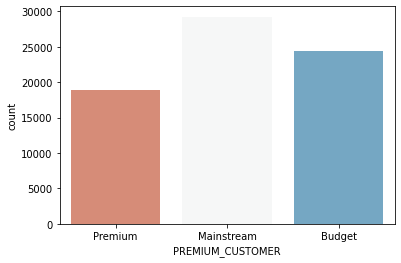

In [100]:
sns.countplot(x='PREMIUM_CUSTOMER', data=purchase_behaviour_df,palette="RdBu")


In [101]:
# Load transaction data 
transaction_df = pd.read_excel("/content/sample_data/QVI_transaction_data.xlsx")
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [102]:
# Check missing values 
transaction_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [103]:
# Check duplicate values 
transaction_df.duplicated().sum()

1

There is 1 duplicate value

In [104]:
transaction_df[transaction_df.duplicated()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [105]:
# drop duplicate values 
transaction_df.drop_duplicates(inplace=True)

In [106]:
#Check again duplicate values that has beed deleteing
transaction_df.duplicated().sum()

0

In [107]:
# Check info of dataframe
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264835 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264835 non-null  int64  
 1   STORE_NBR       264835 non-null  int64  
 2   LYLTY_CARD_NBR  264835 non-null  int64  
 3   TXN_ID          264835 non-null  int64  
 4   PROD_NBR        264835 non-null  int64  
 5   PROD_NAME       264835 non-null  object 
 6   PROD_QTY        264835 non-null  int64  
 7   TOT_SALES       264835 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 18.2+ MB


In [108]:
# Make a copy for each dataframe 
transaction_copy = transaction_df.copy()
customers_data_copy = purchase_behaviour_df.copy()

In [109]:
customers_data_copy.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

We can see  same column of LYLTY_CARD_NBR for each dataframe

In [110]:
customers_transaction =pd.merge(transaction_copy,customers_data_copy,on='LYLTY_CARD_NBR')
customers_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [111]:
#Check column and rows 
customers_transaction.shape

(264835, 10)

There are 264835 rows and 10 features

In [112]:
customers_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264835 entries, 0 to 264834
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264835 non-null  int64  
 1   STORE_NBR         264835 non-null  int64  
 2   LYLTY_CARD_NBR    264835 non-null  int64  
 3   TXN_ID            264835 non-null  int64  
 4   PROD_NBR          264835 non-null  int64  
 5   PROD_NAME         264835 non-null  object 
 6   PROD_QTY          264835 non-null  int64  
 7   TOT_SALES         264835 non-null  float64
 8   LIFESTAGE         264835 non-null  object 
 9   PREMIUM_CUSTOMER  264835 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [113]:
# Date is not in the right format
# Function that converts Excel integer into yyyy-mm-dd format
def xlseriesdate_to_datetime(xlserialdate):
    excel_anchor = datetime.datetime(1900, 1, 1)
    if(xlserialdate < 60):
        delta_in_days = datetime.timedelta(days = (xlserialdate - 1))
    else:
        delta_in_days = datetime.timedelta(days = (xlserialdate - 2))
    converted_date = excel_anchor + delta_in_days
    return converted_date

In [114]:
# Apply function to Date feature in transactionData dataset
customers_transaction['DATE'] = customers_transaction['DATE'].apply(xlseriesdate_to_datetime)

In [115]:
# Check right format of DATE
customers_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [116]:
# Extract PACK_SIZE from PROD_NAME column
customers_transaction["PACK_SIZE"] = customers_transaction["PROD_NAME"].str.extract("(\d+)")
customers_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170


In [117]:
customers_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264835 entries, 0 to 264834
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264835 non-null  datetime64[ns]
 1   STORE_NBR         264835 non-null  int64         
 2   LYLTY_CARD_NBR    264835 non-null  int64         
 3   TXN_ID            264835 non-null  int64         
 4   PROD_NBR          264835 non-null  int64         
 5   PROD_NAME         264835 non-null  object        
 6   PROD_QTY          264835 non-null  int64         
 7   TOT_SALES         264835 non-null  float64       
 8   LIFESTAGE         264835 non-null  object        
 9   PREMIUM_CUSTOMER  264835 non-null  object        
 10  PACK_SIZE         264835 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 24.2+ MB


In [118]:
# change PACK_SIZE to integer
customers_transaction["PACK_SIZE"] = pd.to_numeric(customers_transaction["PACK_SIZE"])
customers_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264835 entries, 0 to 264834
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264835 non-null  datetime64[ns]
 1   STORE_NBR         264835 non-null  int64         
 2   LYLTY_CARD_NBR    264835 non-null  int64         
 3   TXN_ID            264835 non-null  int64         
 4   PROD_NBR          264835 non-null  int64         
 5   PROD_NAME         264835 non-null  object        
 6   PROD_QTY          264835 non-null  int64         
 7   TOT_SALES         264835 non-null  float64       
 8   LIFESTAGE         264835 non-null  object        
 9   PREMIUM_CUSTOMER  264835 non-null  object        
 10  PACK_SIZE         264835 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 24.2+ MB


In [119]:
customers_transaction["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g', 'WW Original Stacked Chips 160g',
       'CCs Original 175g', 'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Tyrrells Crisps     Lightly Salted 165g',
       'Kettle Tortilla ChpsFeta&Garlic 150g',
       'Dorito Corn Chp     Supreme 380g', 'Doritos Mexicana    170g',
       'Smiths Crinkle Chips Salt & Vinegar 330g', 'Kettle Original 175g',
       'Tyrrells Crisps     Ched & Chives 165g',
       'Infuzions BBQ Rib   Prawn Crackers 110g',
       'Grain Waves         Sweet Chilli 210g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Thins Potato Chips  Hot & Spicy 175g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Red Rock Deli Thai  Chilli&Lime 150g',
       'GrnWves Plus Btroot

In [120]:
# Check how many unique PROD_NAME
len(customers_transaction["PROD_NAME"].unique())

114

In [121]:
# Clean the PROD_NAME column text
# remove special characters '&' and '/'
# remove product weights
def clean_text(text):
    text = re.sub('[&/]', ' ', text)
    text = re.sub('\d\w*', ' ', text)
    return text

# Apply text cleaning function to PROD_NAME column
customers_transaction['PROD_NAME'] = customers_transaction['PROD_NAME'].apply(clean_text)

In [122]:
customers_transaction["PROD_NAME"].head()

0    Natural Chip        Compny SeaSalt 
1                  CCs Nacho Cheese     
2            WW Original Stacked Chips  
3                         CCs Original  
4    Smiths Crinkle Cut  Chips Chicken  
Name: PROD_NAME, dtype: object

In [123]:
#Check the top 10 words of frequency appeared
prod_name = customers_transaction["PROD_NAME"]
words_count = pd.Series(' '.join(prod_name).split()).value_counts()
words_count[:20]

Chips       49770
Kettle      41288
Smiths      28859
Salt        27976
Cheese      27890
Pringles    25102
Doritos     24962
Crinkle     23960
Corn        22063
Original    21560
Cut         20753
Chip        18645
Chicken     18576
Salsa       18094
Cream       16926
Chilli      15390
Sea         14145
Thins       14075
Sour        13882
Crisps      12607
dtype: int64

In [124]:
# Drop Salsa word from the dataframe
customers_transaction = customers_transaction[customers_transaction['PROD_NAME'].str.contains(r"[Ss]alsa") == False]
customers_transaction.shape[0]


246741

In [125]:
# Value counts of PROD_QTY
customers_transaction.PROD_QTY.value_counts()

2      220069
1       25476
5         415
3         408
4         371
200         2
Name: PROD_QTY, dtype: int64

There is an anomaly to see only  2 occurences of 200 compared to other PROD_QTY. It is better to see further whether there is a mistake or not.

In [126]:
customers_transaction[customers_transaction["PROD_QTY"]==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE
71456,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,OLDER FAMILIES,Premium,380
71457,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,OLDER FAMILIES,Premium,380


we can see that the PROD_QTY of 200 has been made by 1 person through detecting same loyalty card number. we can drop both of these rows. 




In [127]:
#drop rows
customers_transaction.drop(customers_transaction.index[customers_transaction['LYLTY_CARD_NBR'] == 226000], inplace = True)

In [128]:
# Value counts of PROD_QTY
customers_transaction.PROD_QTY.value_counts()

2    220069
1     25476
5       415
3       408
4       371
Name: PROD_QTY, dtype: int64

In [129]:
# Check date issue whether there is missing value
customers_transaction["DATE"].nunique()

364

there is 1 day missed through 1 year period

In [130]:
# Check the range of date
customers_transaction.sort_values("DATE")

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE
29285,2018-07-01,108,108339,110148,30,Doritos Corn Chips Cheese Supreme,2,8.8,NEW FAMILIES,Mainstream,170
131042,2018-07-01,194,194091,193649,70,Tyrrells Crisps Lightly Salted,2,8.4,OLDER SINGLES/COUPLES,Premium,165
162566,2018-07-01,126,126198,130095,36,Kettle Chilli,2,10.8,RETIREES,Mainstream,175
236371,2018-07-01,229,229064,230739,96,WW Original Stacked Chips,2,3.8,YOUNG SINGLES/COUPLES,Budget,160
14144,2018-07-01,196,196232,196850,58,Red Rock Deli Chikn Garlic Aioli,2,5.4,MIDAGE SINGLES/COUPLES,Mainstream,150
...,...,...,...,...,...,...,...,...,...,...,...
57832,2019-06-30,225,225085,225168,10,RRD SR Slow Rst Pork Belly,2,5.4,OLDER FAMILIES,Mainstream,150
127482,2019-06-30,125,125010,128289,47,Doritos Corn Chips Original,2,8.8,OLDER SINGLES/COUPLES,Premium,170
153379,2019-06-30,222,222003,221524,17,Kettle Sensations BBQ Maple,2,9.2,RETIREES,Mainstream,150
248090,2019-06-30,111,111118,113273,99,Pringles Sthrn FriedChicken,1,3.7,YOUNG SINGLES/COUPLES,Mainstream,134


we can see the range between 2018-07-01 to 2019-06-30

In [131]:
# Generate a list of dates with transactions in ascending order 
date_counts = customers_transaction.groupby('DATE').size()

# Then compare to a full list of dates within the same range to find differences between them 
pd.date_range(start = '2018-07-01', end = '2019-06-30' ).difference(date_counts.index)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

We can see that there is no sales on 2018-12-25 which is public holiday/Christmas.

In [132]:
# Analyze the PACK SIZE column
customers_transaction.sort_values("PACK_SIZE",ascending=False)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE
179598,2018-10-08,130,130323,135005,4,Dorito Corn Chp Supreme,2,13.0,RETIREES,Premium,380
134467,2018-07-14,259,259198,258722,4,Dorito Corn Chp Supreme,2,13.0,OLDER SINGLES/COUPLES,Premium,380
134511,2018-10-17,260,260281,259547,14,Smiths Crnkle Chip Orgnl Big Bag,2,11.8,OLDER SINGLES/COUPLES,Premium,380
243757,2019-01-03,46,46066,41888,14,Smiths Crnkle Chip Orgnl Big Bag,1,5.9,YOUNG SINGLES/COUPLES,Mainstream,380
134495,2018-12-05,260,260126,259283,14,Smiths Crnkle Chip Orgnl Big Bag,2,11.8,OLDER SINGLES/COUPLES,Premium,380
...,...,...,...,...,...,...,...,...,...,...,...
136103,2018-08-14,101,101043,100290,38,Infuzions Mango Chutny Papadums,1,2.4,RETIREES,Budget,70
240003,2019-05-11,213,213115,212624,38,Infuzions Mango Chutny Papadums,2,4.8,YOUNG SINGLES/COUPLES,Mainstream,70
161488,2019-01-24,110,110208,112844,38,Infuzions Mango Chutny Papadums,2,4.8,RETIREES,Mainstream,70
86685,2019-05-29,48,48204,44328,38,Infuzions Mango Chutny Papadums,2,4.8,OLDER SINGLES/COUPLES,Budget,70


we can see the lowest PACK_SIZE is 70 and the weighest is 380

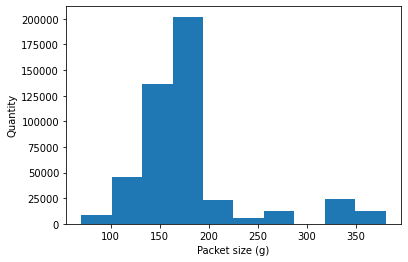

In [133]:
# check the comparison between PACK_SIZE and PROD_QTY
plt.hist(customers_transaction['PACK_SIZE'], weights=customers_transaction['PROD_QTY']);
plt.xlabel('Packet size (g)');
plt.ylabel('Quantity');

In [134]:
# Create Brand_NAMES based on the first word in the PROD_NAME
customers_transaction["BRAND_NAME"] = customers_transaction["PROD_NAME"].str.split().str.get(0)
customers_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175,CCs
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160,WW
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175,CCs
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170,Smiths


In [135]:
customers_transaction.BRAND_NAME.unique()

array(['Natural', 'CCs', 'WW', 'Smiths', 'Kettle', 'Tyrrells', 'Dorito',
       'Doritos', 'Infuzions', 'Grain', 'Thins', 'Red', 'GrnWves',
       'Tostitos', 'Pringles', 'Cobs', 'Twisties', 'RRD', 'Infzns',
       'Burger', 'NCC', 'Cheezels', 'Smith', 'French', 'Sunbites',
       'Cheetos', 'Woolworths', 'Snbts'], dtype=object)

In [136]:
# Create a function to identify the string replacements needed to avoid double BRAND_NAMES.
def replace_brandname(line):
    name = line['BRAND_NAME']
    if name == "Infzns":
        return "Infuzions"
    elif name == "Red":
        return "Red Rock Deli"
    elif name == "RRD":
        return "Red Rock Deli"
    elif name == "Grain":
        return "Grain Waves"
    elif name == "GrnWves":
        return "Grain Waves"
    elif name == "Snbts":
        return "Sunbites"
    elif name == "Natural":
        return "Natural Chip Co"
    elif name == "NCC":
        return "Natural Chip Co"
    elif name == "WW":
        return "Woolworths"
    elif name == "Smith":
        return "Smiths"
    elif name == "Dorito":
        return "Doritos"
    else:
        return name 

# Then apply the function to clean the brand names
customers_transaction["BRAND_NAME"] = customers_transaction.apply(lambda line: replace_brandname(line), axis=1)

# Check that there are no duplicate brands 
customers_transaction["BRAND_NAME"].unique()

array(['Natural Chip Co', 'CCs', 'Woolworths', 'Smiths', 'Kettle',
       'Tyrrells', 'Doritos', 'Infuzions', 'Grain Waves', 'Thins',
       'Red Rock Deli', 'Tostitos', 'Pringles', 'Cobs', 'Twisties',
       'Burger', 'Cheezels', 'French', 'Sunbites', 'Cheetos'],
      dtype=object)

In [137]:
# Change PREMIUM_MEMBER to MEMBER_TYPE for easy use
customers_transaction = customers_transaction.rename(columns={"PREMIUM_CUSTOMER":"MEMBER_TYPE"})

In [138]:
#Change TOT_SALES to TOTAL_SALES for easy use 
customers_transaction = customers_transaction.rename(columns={"TOT_SALES":"TOTAL_SALES"})
customers_transaction


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOTAL_SALES,LIFESTAGE,MEMBER_TYPE,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175,CCs
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160,Woolworths
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175,CCs
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170,Smiths
...,...,...,...,...,...,...,...,...,...,...,...,...
264830,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,YOUNG SINGLES/COUPLES,Premium,175,Kettle
264831,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,YOUNG SINGLES/COUPLES,Premium,175,Tostitos
264832,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,YOUNG SINGLES/COUPLES,Premium,170,Doritos
264833,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,YOUNG SINGLES/COUPLES,Premium,150,Doritos


# Total Sales over time



In [139]:
TOTAL_SALES_TIME = pd.concat([customers_transaction["DATE"],customers_transaction["TOTAL_SALES"]],axis=1)
TOTAL_SALES_TIME


,DATE,TOTAL_SALES
0,2018-10-17,6.0
1,2019-05-14,6.3
2,2018-11-10,3.8
3,2019-03-09,2.1
4,2019-05-20,2.9
...,...,...
264830,2019-03-09,10.8
264831,2018-08-13,4.4
264832,2018-11-06,8.8
264833,2018-12-27,7.8


In [140]:
# Do calculation of total sales in each day by implementing pivot 
TOTAL_SALES_OVER_TIME = pd.pivot_table(customers_transaction, values = 'TOTAL_SALES', index = 'DATE', aggfunc = 'sum')
TOTAL_SALES_OVER_TIME.head()


,TOTAL_SALES
DATE,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


In [141]:
ALL_DATES = pd.DataFrame(index = pd.date_range(start = '2018-07-01', end = '2019-06-30'))
ALL_DATES['TOTAL_SALES'] = 0
len(ALL_DATES)

365

In [142]:
COMPLETED_DATES = TOTAL_SALES_OVER_TIME + ALL_DATES
COMPLETED_DATES.fillna(0,inplace=True)

In [143]:
COMPLETED_DATES.head()

,TOTAL_SALES
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


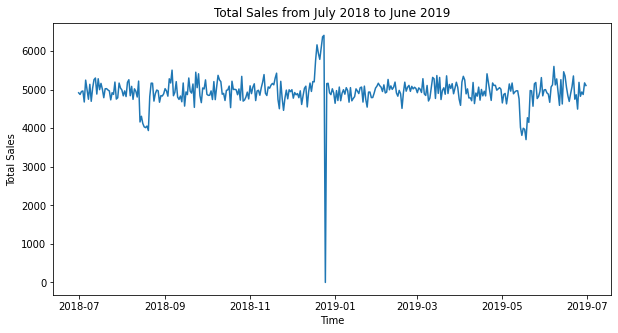

In [144]:
import datetime as dt
timeline = COMPLETED_DATES.index
graph = COMPLETED_DATES['TOTAL_SALES']

fig, ax = plt.subplots(figsize = (10, 5))
date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
ax.plot(timeline, graph)
plt.title('Total Sales from July 2018 to June 2019')
plt.xlabel('Time')
plt.ylabel('Total Sales')

plt.show()

In [145]:
COMPLETED_DATES[COMPLETED_DATES["TOTAL_SALES"]==0]

,TOTAL_SALES
2018-12-25,0.0


We can see there is a drop due to holiday/Christmas.

In [146]:
DECEMBER_SALES = COMPLETED_DATES[(COMPLETED_DATES.index < "2019-01-01") & (COMPLETED_DATES.index > "2018-11-30")]
DECEMBER_SALES.head()

,TOTAL_SALES
2018-12-01,5000.9
2018-12-02,4781.1
2018-12-03,4927.0
2018-12-04,4869.4
2018-12-05,4900.5


In [147]:
#add 1 to start the date from 1st
DECEMBER_SALES.reset_index(drop=True,inplace=True)
DECEMBER_SALES["DATE"] = DECEMBER_SALES.index + 1
DECEMBER_SALES

,TOTAL_SALES,DATE
0,5000.9,1
1,4781.1,2
2,4927.0,3
3,4869.4,4
4,4900.5,5
5,4792.9,6
6,4971.7,7
7,4618.4,8
8,4844.8,9
9,5037.7,10


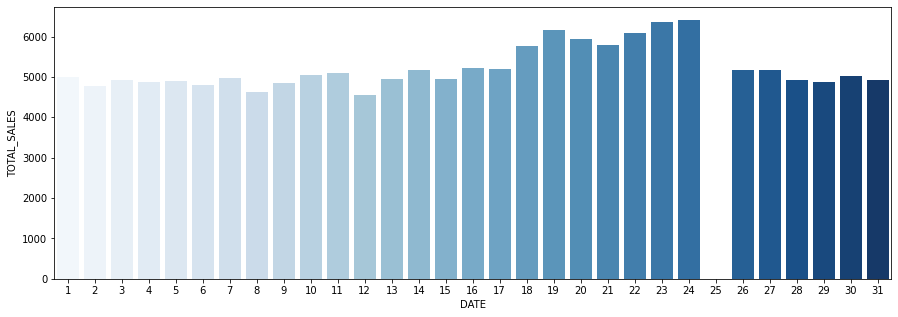

In [148]:
# Detail Of December Sales
plt.figure(figsize = (15,5))
sns.barplot(x ="DATE", y ='TOTAL_SALES', data = DECEMBER_SALES,palette = "Blues")

In [149]:
customers_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOTAL_SALES,LIFESTAGE,MEMBER_TYPE,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175,CCs
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160,Woolworths
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175,CCs
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170,Smiths


# LIFESTAGE Analysis

In [150]:
customers_transaction.LIFESTAGE.value_counts()

OLDER SINGLES/COUPLES     50792
RETIREES                  46431
OLDER FAMILIES            45158
YOUNG FAMILIES            40494
YOUNG SINGLES/COUPLES     33969
MIDAGE SINGLES/COUPLES    23398
NEW FAMILIES               6497
Name: LIFESTAGE, dtype: int64

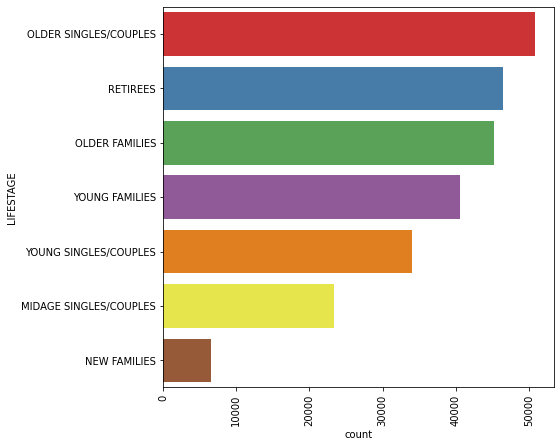

In [151]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
sns.countplot(y='LIFESTAGE', data=customers_transaction,order=customers_transaction['LIFESTAGE'].value_counts().index, palette="Set1")

We can see that the most customers are from older singles/couple and the less customers are from New Families.

# Customer *Segment* Analysis
We have cleaned the data and do some analysis for a few featuress. It is the time to do customer segment analysis to make a good recommendation for business strategy about chips market. We will answer a few metrics as follows:

* Who spends the most on chips, describing customers by lifestage 
* How many customers are in each segment
* How many chips are bought per customer by segment
* What is the average chip price by customer segment
* The customer’s total spend over the period and total spend for each transaction to understand what proportion of their grocery spend is on chips.
* Spending on other snacks, such as crackers and biscuits, to determine the preference and the purchase frequency of chips compared to other snacks
* Proportion of customers in each customer segment overall to compare against the mix of customers who purchase chips






In [152]:
# calculate total sales by lifestage and member type and generate a list  
total_sales_customers = customers_transaction.groupby(['LIFESTAGE','MEMBER_TYPE'])['TOTAL_SALES'].agg(['sum'])
total_sales_customers.rename(columns={"sum":"Total_Sum_Sales"},inplace=True)
total_sales_customers.sort_values("Total_Sum_Sales",ascending=False)

Total_Sum_Sales
LIFESTAGE              MEMBER_TYPE                 
OLDER FAMILIES         Budget             156863.75
YOUNG SINGLES/COUPLES  Mainstream         147582.20
RETIREES               Mainstream         145168.95
YOUNG FAMILIES         Budget             129717.95
OLDER SINGLES/COUPLES  Budget             127833.60
                       Mainstream         124648.50
                       Premium            123531.55
RETIREES               Budget             105916.30
OLDER FAMILIES         Mainstream          96413.55
RETIREES               Premium             91296.65
YOUNG FAMILIES         Mainstream          86338.25
MIDAGE SINGLES/COUPLES Mainstream          84734.25
YOUNG FAMILIES         Premium             78571.70
OLDER FAMILIES         Premium             75242.60
YOUNG SINGLES/COUPLES  Budget              57122.10
MIDAGE SINGLES/COUPLES Premium             54443.85
YOUNG SINGLES/COUPLES  Premium             39052.30
MIDAGE SINGLES/COUPLES Budget              33345.70
NEW FAMILIES           Budget              20607.45
                       Mainstream          15979.70
                       Premium             10760.80

Older Families with Budget type spend the most sales.

Text(0.5, 1.0, 'Total Sales Distributions By Customer Segment')

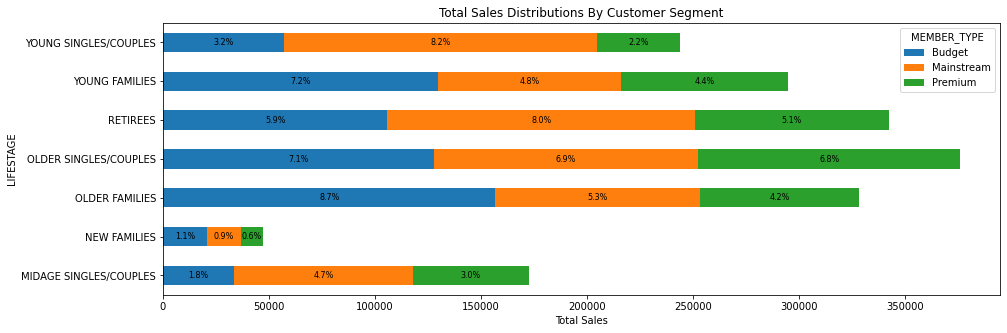

In [153]:
# Get the total sales 
total_sales = customers_transaction['TOTAL_SALES'].agg(['sum'])['sum']

# Plot a breakdown of the total sales by lifestage and member type
total_sales_customers_breakdown = customers_transaction.groupby(['LIFESTAGE','MEMBER_TYPE'], as_index = False)['TOTAL_SALES'].agg(['sum', 'mean']).unstack('MEMBER_TYPE').fillna(0)
ax = total_sales_customers_breakdown['sum'].plot(kind='barh', stacked=True, figsize=(15, 5))

# Add percentages of the summed total sales as labels to each bar 
# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    label = width / total_sales * 100
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{(label):.1f}%' 
    
    # Set label positions
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
        
ax.set_xlabel("Total Sales")
ax.set_title('Total Sales Distributions By Customer Segment')

The top 3 of total sales distributions are Older Families budget, Youngsingles/couples mainstream, and retirees mainstream. However, New Families spend less compared to each customer segment on each member type.

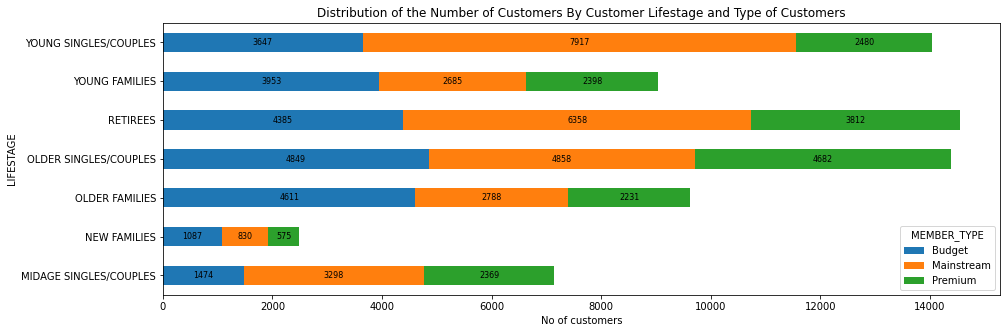

In [154]:
# Plot the numbers of customers in each segment by counting the unique LYLTY_CARD_NBR entries
sum_customers_breakdown= customers_transaction.groupby(['LIFESTAGE','MEMBER_TYPE'])['LYLTY_CARD_NBR'].agg('nunique').unstack('MEMBER_TYPE').fillna(0)
ax = sum_customers_breakdown.plot(kind='barh', stacked=True, figsize=(15, 5))

# Add customer numbers as labels to each bar 
# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{(width):.0f}'
    
    # Set label positions
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
        
ax.set_xlabel("No of customers")
ax.set_title('Distribution of the Number of Customers By Customer Lifestage and Type of Customers')
plt.show()

There are more Young singles/couples - mainstream, Retirees - mainstream and Midage singles/couples-mainstream who buy chips. This contributes to more sales to these customer segments however this is not a major driver for the Older families - budget segment. We can see average unit of customer who bought chips over MEMBER_CUSTOMER and LIFESTAGE.


In [155]:
# Average units per customer by MEMBER_TYPE and LIFESTAGE
avg_units = customers_transaction.groupby(['MEMBER_TYPE', 'LIFESTAGE']).PROD_QTY.sum() / customers_transaction.groupby(['MEMBER_TYPE', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()
avg_units = pd.DataFrame(avg_units, columns = {'Average Unit per Customer'})
avg_units.sort_values(by ='Average Unit per Customer', ascending = False).head()

,,Average Unit per Customer
MEMBER_TYPE,LIFESTAGE,
Mainstream,OLDER FAMILIES,9.255380
Budget,OLDER FAMILIES,9.076773
Premium,OLDER FAMILIES,9.071717
Budget,YOUNG FAMILIES,8.722995
Premium,YOUNG FAMILIES,8.716013


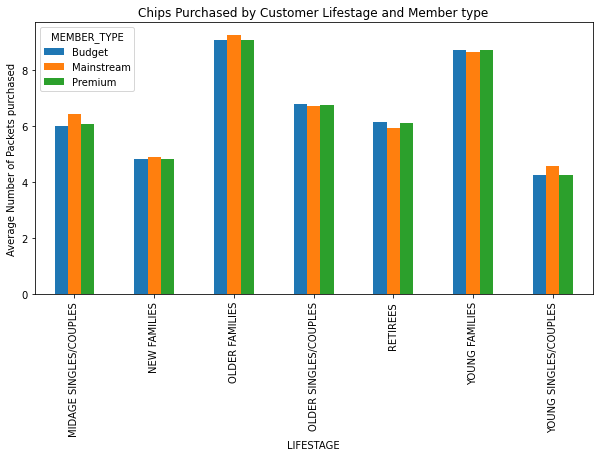

In [156]:
# Plot the average no of chip packets bought per customer by LIFESTAGE and MEMBER_TYPE.
avg_units = customers_transaction.groupby(['MEMBER_TYPE', 'LIFESTAGE']).PROD_QTY.sum() / customers_transaction.groupby(['MEMBER_TYPE', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()
ax = avg_units.unstack('MEMBER_TYPE').fillna(0).plot.bar(stacked = False,figsize=(10, 5))
ax.set_ylabel("Average Number of Packets purchased")
ax.set_title('Chips Purchased by Customer Lifestage and Member type')
plt.xticks(rotation=90)
plt.show()

The customers of older families and young families contributes to buy more chips however young singles/couples contributes less compared to these customers. 

In [157]:
# Create a column for the unit price of chips purchased per transaction 
customers_transaction['UNIT_PRICE'] = customers_transaction['TOTAL_SALES']/customers_transaction['PROD_QTY']

In [158]:
customers_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOTAL_SALES,LIFESTAGE,MEMBER_TYPE,PACK_SIZE,BRAND_NAME,UNIT_PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,Natural Chip Co,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175,CCs,2.10
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160,Woolworths,1.90
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175,CCs,2.10
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170,Smiths,1.45


In [159]:
# Average price per unit by MEMBER_TYPE and LIFESTAGE
avg_price = customers_transaction.groupby(['MEMBER_TYPE', 'LIFESTAGE'])["UNIT_PRICE"].agg(['mean']).unstack("MEMBER_TYPE").fillna(0)
avg_price

mean                     
MEMBER_TYPE               Budget Mainstream   Premium
LIFESTAGE                                            
MIDAGE SINGLES/COUPLES  3.743328   3.994241  3.770698
NEW FAMILIES            3.917688   3.916133  3.872110
OLDER FAMILIES          3.745340   3.737077  3.717000
OLDER SINGLES/COUPLES   3.882096   3.814665  3.893236
RETIREES                3.924404   3.844294  3.920942
YOUNG FAMILIES          3.760737   3.724533  3.762150
YOUNG SINGLES/COUPLES   3.657366   4.065642  3.665414

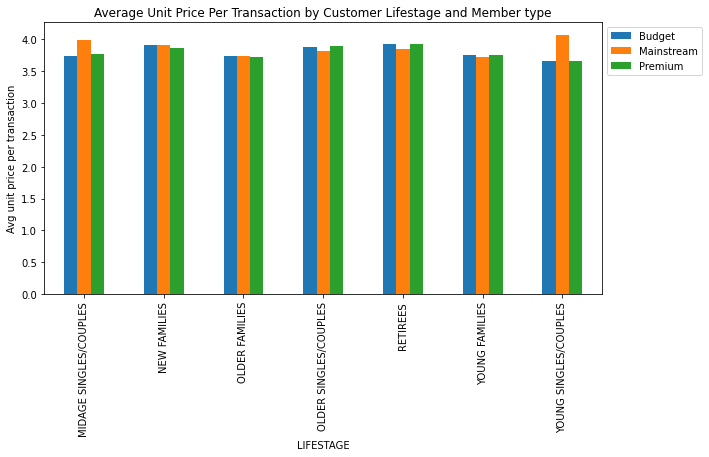

In [160]:
# Plot the distribution of the average unit price per transaction by LIFESTAGE and MEMBER_TYPE.
avg_priceperunit = customers_transaction.groupby(['LIFESTAGE', 'MEMBER_TYPE'], as_index = False)['UNIT_PRICE'].agg(['mean']).unstack('MEMBER_TYPE').fillna(0)
ax = avg_priceperunit['mean'].plot.bar(stacked=False, figsize=(10, 5))
ax.set_ylabel("Avg unit price per transaction")
ax.set_title('Average Unit Price Per Transaction by Customer Lifestage and Member type')
plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
plt.show()

The mainstream type for midage singles/couples and young singles/couples are more willing to buy more chips compared to other type of customers such as budget and premium. It is likely that chips is not their choice of snack. We can check the difference between midage singles/couples and young singles/couples using t-test to check whether the difference is statistically significant. 

In [161]:
# Identify the groups to test the hypothesis 
mainstream = customers_transaction["MEMBER_TYPE"] == "Mainstream"
young_midage = (customers_transaction["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (customers_transaction["LIFESTAGE"] == "YOUNG SINGLES/COUPLES")
premium_budget = customers_transaction["MEMBER_TYPE"] != "Mainstream"

group1 = customers_transaction[mainstream & young_midage]["UNIT_PRICE"]
group2 = customers_transaction[premium_budget & young_midage]["UNIT_PRICE"]

# Generate the t-test to check statistically significant factor
stat, pval = ttest_ind(group1.values, group2.values, equal_var=False)

print(pval, stat)

6.967354233018139e-306 37.6243885962295


The P-value that is being close to 0 implies that the difference of maintream of midage singles/couples and young singles/couples are higher than to the premium or budget of midage singles/couples and young singles/couples.

In [162]:
# Save the join data into new CSV file
customers_transaction.to_csv("customer_transaction.csv",index=False)

## Further Analysis of specific customer segment

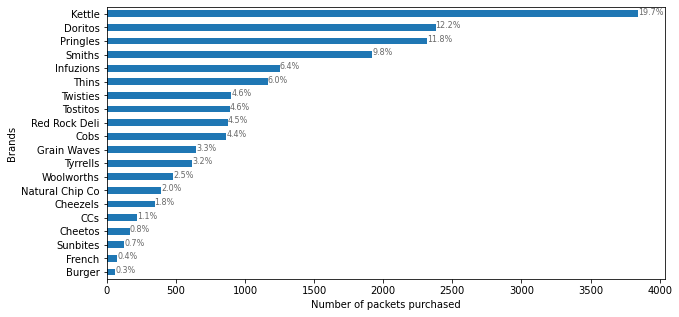

In [163]:
# Create a visual of what brands of midage young singles are purchasing the most for a general brand
young_mainstream = customers_transaction.loc[customers_transaction['LIFESTAGE'] == "YOUNG SINGLES/COUPLES"]
young_mainstream = young_mainstream.loc[young_mainstream['MEMBER_TYPE'] == "Mainstream"]
ax = young_mainstream["BRAND_NAME"].value_counts().sort_values(ascending = True).plot.barh(figsize=(10, 5))

totals = []

# find the values and append to list
for rect in ax.patches:
    totals.append(rect.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for rect in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(rect.get_width()+.3, rect.get_y()+.38, \
            str(round((rect.get_width()/total)*100, 1))+'%', fontsize=8,
color='dimgrey', va='center')
ax.set_xlabel("Number of packets purchased")
ax.set_ylabel("Brands")
plt.show()

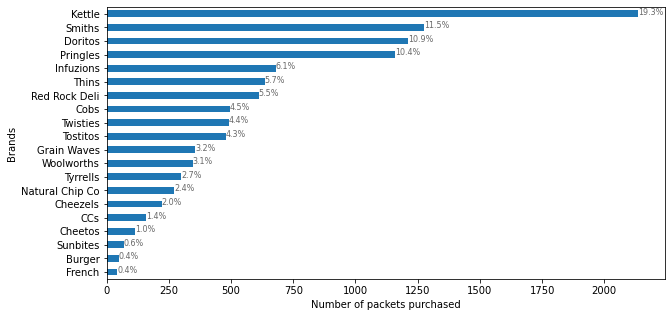

In [164]:
# Create a visual of what brands of midage young singles are purchasing the most for a general brand
midage_mainstream = customers_transaction.loc[customers_transaction['LIFESTAGE'] == "MIDAGE SINGLES/COUPLES"]
midage_mainstream = midage_mainstream.loc[midage_mainstream['MEMBER_TYPE'] == "Mainstream"]
ax = midage_mainstream["BRAND_NAME"].value_counts().sort_values(ascending = True).plot.barh(figsize=(10, 5))

totals = []

# find the values and append to list
for rect in ax.patches:
    totals.append(rect.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for rect in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(rect.get_width()+.3, rect.get_y()+.38, \
            str(round((rect.get_width()/total)*100, 1))+'%', fontsize=8,
color='dimgrey', va='center')
ax.set_xlabel("Number of packets purchased")
ax.set_ylabel("Brands")
plt.show()

we can see that the top 3 of most famous brands are kettle,smiths and doritos and the lowest brands are French,Burger and Sunbites by using number of sales.

## Affinity to Brand

divide the mainstream and other member types to calculate the association rule of the chips

In [165]:
temp_Association = customers_transaction.copy()
temp_Association["group"] = temp_Association["LIFESTAGE"] + ' - ' + temp_Association['MEMBER_TYPE']

In [166]:
temp_Association

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOTAL_SALES,LIFESTAGE,MEMBER_TYPE,PACK_SIZE,BRAND_NAME,UNIT_PRICE,group
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,Natural Chip Co,3.00,YOUNG SINGLES/COUPLES - Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175,CCs,2.10,MIDAGE SINGLES/COUPLES - Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160,Woolworths,1.90,MIDAGE SINGLES/COUPLES - Budget
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175,CCs,2.10,MIDAGE SINGLES/COUPLES - Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170,Smiths,1.45,MIDAGE SINGLES/COUPLES - Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264830,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,YOUNG SINGLES/COUPLES,Premium,175,Kettle,5.40,YOUNG SINGLES/COUPLES - Premium
264831,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,YOUNG SINGLES/COUPLES,Premium,175,Tostitos,4.40,YOUNG SINGLES/COUPLES - Premium
264832,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,YOUNG SINGLES/COUPLES,Premium,170,Doritos,4.40,YOUNG SINGLES/COUPLES - Premium
264833,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,YOUNG SINGLES/COUPLES,Premium,150,Doritos,3.90,YOUNG SINGLES/COUPLES - Premium


In [167]:
groups = pd.get_dummies(temp_Association["group"])
brands = pd.get_dummies(temp_Association["BRAND_NAME"])
groups_brands = groups.join(brands)
groups_brands

,MIDAGE SINGLES/COUPLES - Budget,MIDAGE SINGLES/COUPLES - Mainstream,MIDAGE SINGLES/COUPLES - Premium,NEW FAMILIES - Budget,NEW FAMILIES - Mainstream,NEW FAMILIES - Premium,OLDER FAMILIES - Budget,OLDER FAMILIES - Mainstream,OLDER FAMILIES - Premium,OLDER SINGLES/COUPLES - Budget,OLDER SINGLES/COUPLES - Mainstream,OLDER SINGLES/COUPLES - Premium,RETIREES - Budget,RETIREES - Mainstream,RETIREES - Premium,YOUNG FAMILIES - Budget,YOUNG FAMILIES - Mainstream,YOUNG FAMILIES - Premium,YOUNG SINGLES/COUPLES - Budget,YOUNG SINGLES/COUPLES - Mainstream,YOUNG SINGLES/COUPLES - Premium,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,Grain Waves,Infuzions,Kettle,Natural Chip Co,Pringles,Red Rock Deli,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
264831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
264832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
264833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [168]:
freq_groupsbrands = apriori(groups_brands, min_support=0.008, use_colnames=True)
rules = association_rules(freq_groupsbrands, metric="lift", min_threshold=0.5)
rules.sort_values('confidence', ascending = False, inplace = True)

In [169]:
set_temp_association = temp_Association["group"].unique()
rules[rules["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in set_temp_association)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
41,(YOUNG SINGLES/COUPLES - Mainstream),(Kettle),0.079209,0.167335,0.015579,0.196684,1.175395,0.002325,1.036536
1,(MIDAGE SINGLES/COUPLES - Mainstream),(Kettle),0.044967,0.167335,0.008657,0.192519,1.150503,0.001132,1.031189
23,(RETIREES - Budget),(Kettle),0.057652,0.167335,0.010505,0.182214,1.088922,0.000858,1.018195
32,(RETIREES - Premium),(Kettle),0.049591,0.167335,0.008981,0.181105,1.082291,0.000683,1.016816
13,(OLDER SINGLES/COUPLES - Budget),(Kettle),0.069596,0.167335,0.012422,0.178488,1.066654,0.000776,1.013577
20,(OLDER SINGLES/COUPLES - Premium),(Kettle),0.067111,0.167335,0.011944,0.177970,1.063555,0.000714,1.012937
27,(RETIREES - Mainstream),(Kettle),0.080936,0.167335,0.013723,0.169554,1.013265,0.000180,1.002673
16,(OLDER SINGLES/COUPLES - Mainstream),(Kettle),0.069146,0.167335,0.011490,0.166168,0.993030,-0.000081,0.998601
35,(YOUNG FAMILIES - Budget),(Kettle),0.071991,0.167335,0.011117,0.154422,0.922834,-0.000930,0.984729
5,(OLDER FAMILIES - Budget),(Kettle),0.087193,0.167335,0.013456,0.154318,0.922212,-0.001135,0.984608


In [170]:
rules[rules['antecedents'] == {'YOUNG SINGLES/COUPLES - Mainstream'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
41,(YOUNG SINGLES/COUPLES - Mainstream),(Kettle),0.079209,0.167335,0.015579,0.196684,1.175395,0.002325,1.036536
38,(YOUNG SINGLES/COUPLES - Mainstream),(Doritos),0.079209,0.102229,0.009642,0.121725,1.190707,0.001544,1.022198
42,(YOUNG SINGLES/COUPLES - Mainstream),(Pringles),0.079209,0.101735,0.009382,0.118451,1.164306,0.001324,1.018962


for young singles/couples mainstream tends to buy Kettle as the brand of choice based on the association table and some examples of other types as follows:

In [171]:
rules[rules['antecedents'] == {'MIDAGE SINGLES/COUPLES - Mainstream'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(MIDAGE SINGLES/COUPLES - Mainstream),(Kettle),0.044967,0.167335,0.008657,0.192519,1.150503,0.001132,1.031189


for MIDAGE SINGLES/COUPLES - Mainstream, kettle is the brand of choice

In [172]:
rules[rules['antecedents'] == {'RETIREES - Mainstream'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,(RETIREES - Mainstream),(Kettle),0.080936,0.167335,0.013723,0.169554,1.013265,0.000180,1.002673
31,(RETIREES - Mainstream),(Smiths),0.080936,0.123013,0.009593,0.118528,0.963542,-0.000363,0.994912
28,(RETIREES - Mainstream),(Pringles),0.080936,0.101735,0.008523,0.105308,1.035120,0.000289,1.003993
24,(RETIREES - Mainstream),(Doritos),0.080936,0.102229,0.008466,0.104607,1.023256,0.000192,1.002655


For RETIREES - Mainstream, Kettle, Smith and Pringles has the most brand of choice

In [173]:
# find the target segment
young_mainstream = customers_transaction.loc[customers_transaction['LIFESTAGE'] == "YOUNG SINGLES/COUPLES"]
young_mainstream = young_mainstream.loc[young_mainstream['MEMBER_TYPE'] == "Mainstream"]
target_segment = young_mainstream["BRAND_NAME"].value_counts().sort_values(ascending = True).rename_axis('BRANDS').reset_index(name='TARGET')
target_segment["TARGET"] = target_segment["TARGET"]/ young_mainstream["PROD_QTY"].sum()

# find the non-target segment
not_target_segment = customers_transaction.loc[customers_transaction['LIFESTAGE'] != "YOUNG SINGLES/COUPLES"]
not_target_segment = not_target_segment.loc[not_target_segment['MEMBER_TYPE'] != "Mainstream"]
other = not_target_segment["BRAND_NAME"].value_counts().sort_values(ascending = True).rename_axis('BRANDS').reset_index(name='NON_TARGET')
other["NON_TARGET"] = other["NON_TARGET"] / not_target_segment["PROD_QTY"].sum()

# join the two dataframes 
brand_proportions = target_segment.set_index('BRANDS').join(other.set_index('BRANDS'))
brand_proportions = brand_proportions.reset_index()
brand_proportions['AFFINITY'] = brand_proportions['TARGET']/brand_proportions['NON_TARGET']
brand_proportions.sort_values('AFFINITY', ascending = False)

,BRANDS,TARGET,NON_TARGET,AFFINITY
8,Tyrrells,0.017088,0.013368,1.278261
13,Twisties,0.024845,0.019633,1.265487
18,Doritos,0.065673,0.052512,1.250637
12,Tostitos,0.024569,0.019944,1.231902
19,Kettle,0.106115,0.086574,1.225703
17,Pringles,0.063906,0.052477,1.217784
10,Cobs,0.023851,0.020004,1.192284
15,Infuzions,0.034507,0.029931,1.152881
9,Grain Waves,0.017833,0.016214,1.099869
14,Thins,0.032188,0.029771,1.081164


the affinity index implies that mainstream young singles/couples are more likely to buy Tyrrels chips than any other segment. Burger Rings is less likely to buy by mainstream young singles/couples.

In [174]:
# find the target segment
midage_mainstream = customers_transaction.loc[customers_transaction['LIFESTAGE'] == "MIDAGE SINGLES/COUPLES"]
midage_mainstream = midage_mainstream.loc[midage_mainstream['MEMBER_TYPE'] == "Mainstream"]
target_segment = midage_mainstream["BRAND_NAME"].value_counts().sort_values(ascending = True).rename_axis('BRANDS').reset_index(name='TARGET')
target_segment["TARGET"] = target_segment["TARGET"]/ midage_mainstream["PROD_QTY"].sum()

# find the non-target segment
not_target_segment = customers_transaction.loc[customers_transaction['LIFESTAGE'] != "MIDAGE SINGLES/COUPLES"]
not_target_segment = not_target_segment.loc[not_target_segment['MEMBER_TYPE'] != "Mainstream"]
other = not_target_segment["BRAND_NAME"].value_counts().sort_values(ascending = True).rename_axis('BRANDS').reset_index(name='NON_TARGET')
other["NON_TARGET"] = other["NON_TARGET"] / not_target_segment["PROD_QTY"].sum()

# join the two dataframes 
brand_proportions = target_segment.set_index('BRANDS').join(other.set_index('BRANDS'))
brand_proportions = brand_proportions.reset_index()
brand_proportions['AFFINITY'] = brand_proportions['TARGET']/brand_proportions['NON_TARGET']
brand_proportions.sort_values('AFFINITY', ascending = False)

,BRANDS,TARGET,NON_TARGET,AFFINITY
11,Twisties,0.023099,0.019629,1.176752
19,Kettle,0.100693,0.086155,1.168742
12,Cobs,0.023335,0.020043,1.164263
10,Tostitos,0.022580,0.019859,1.137068
17,Doritos,0.057040,0.052179,1.093173
15,Infuzions,0.032009,0.029763,1.075438
7,Tyrrells,0.014048,0.013314,1.055120
5,Cheezels,0.010418,0.009935,1.048641
16,Pringles,0.054636,0.052449,1.041700
9,Grain Waves,0.016735,0.016243,1.030306


the affinity index implies that mainstream midage singles/couples are more likely to buy Twisties chips than any other segment. Sunbites is less likely to buy by mainstream midage singles/couples.

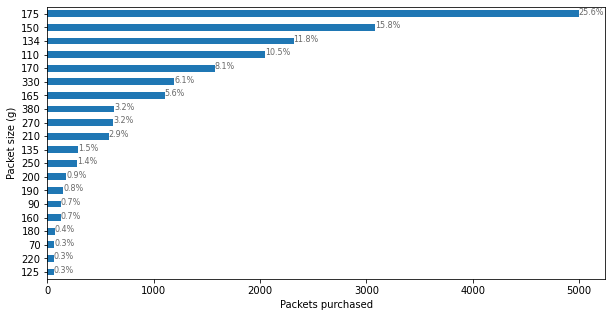

In [175]:
# Plot the distribution of the packet sizes for a general indication of what it most popular. 
young_mainstream = customers_transaction.loc[customers_transaction['LIFESTAGE'] == "YOUNG SINGLES/COUPLES"]
young_mainstream = young_mainstream.loc[young_mainstream['MEMBER_TYPE'] == "Mainstream"]
ax = young_mainstream["PACK_SIZE"].value_counts().sort_values(ascending = True).plot.barh(figsize=(10, 5))
totals = []

# find the values and append to list
for rect in ax.patches:
    totals.append(rect.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for rect in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(rect.get_width()+.3, rect.get_y()+.38, \
            str(round((rect.get_width()/total)*100, 1))+'%', fontsize=8,
color='dimgrey', va='center')
    
ax.set_ylabel("Packet size (g)")
ax.set_xlabel("Packets purchased")
plt.show()

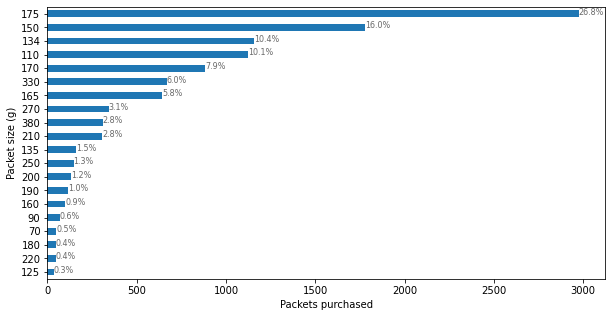

In [176]:
midage_mainstream = customers_transaction.loc[customers_transaction['LIFESTAGE'] == "MIDAGE SINGLES/COUPLES"]
midage_mainstream = midage_mainstream.loc[midage_mainstream['MEMBER_TYPE'] == "Mainstream"]
ax = midage_mainstream["PACK_SIZE"].value_counts().sort_values(ascending = True).plot.barh(figsize=(10, 5))

totals = []

# find the values and append to list
for rect in ax.patches:
    totals.append(rect.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for rect in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(rect.get_width()+.3, rect.get_y()+.38, \
            str(round((rect.get_width()/total)*100, 1))+'%', fontsize=8,
color='dimgrey', va='center') 
ax.set_ylabel("Packet size (g)")
ax.set_xlabel("Packets purchased")
plt.show()

we can see that both young singles/couples and midage singles/couples of mainstream has similar characterictis of buying type of PACK SIZE which is 175 as the most favourite pack size and 125 as the lowest one. 

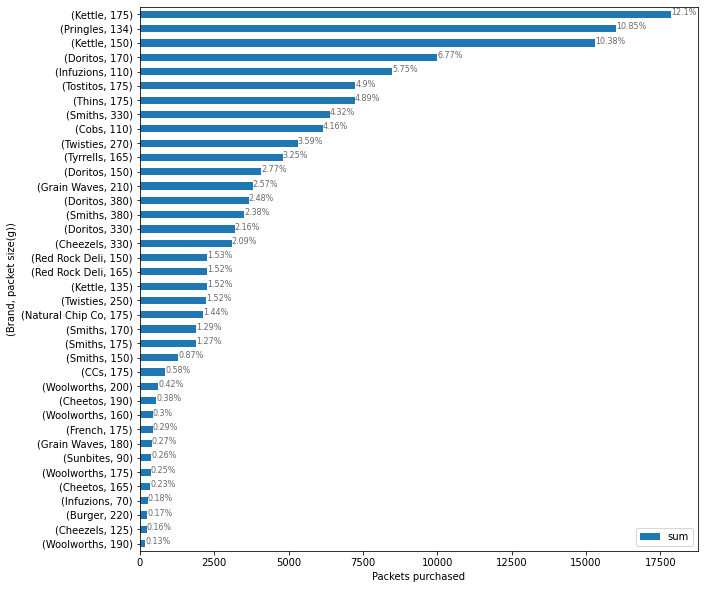

In [177]:
# Also want to check which brands correspond to what sized packets. 
brand_size = young_mainstream.groupby(['BRAND_NAME','PACK_SIZE'], as_index = False)['TOTAL_SALES'].agg(['sum'])
ax = brand_size.sort_values('sum').plot.barh(y = "sum", figsize=(10,10))
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for rect in ax.patches:
    totals.append(rect.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for rect in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(rect.get_width()+.3, rect.get_y()+.38, \
            str(round((rect.get_width()/total)*100, 2))+'%', fontsize=8,
color='dimgrey', va='center')

# invert for largest on top 
#ax.invert_yaxis()
ax.set_ylabel("(Brand, packet size(g))")
ax.set_xlabel("Packets purchased")
plt.show()

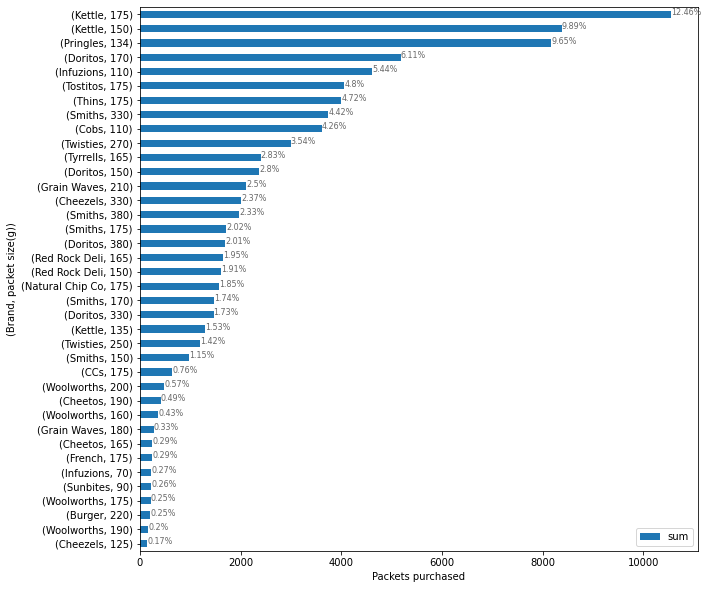

In [178]:
# Also want to check which brands correspond to what sized packets. 
brand_size = midage_mainstream.groupby(['BRAND_NAME','PACK_SIZE'], as_index = False)['TOTAL_SALES'].agg(['sum'])
ax = brand_size.sort_values(by = 'sum').plot.barh(y = "sum", figsize=(10,10))  

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for rect in ax.patches:
    totals.append(rect.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for rect in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(rect.get_width()+.3, rect.get_y()+.38, \
            str(round((rect.get_width()/total)*100, 2))+'%', fontsize=8,
color='dimgrey', va='center')

# invert for largest on top 
#ax.invert_yaxis()
ax.set_ylabel("(Brand, packet size(g))")
ax.set_xlabel("Packets purchased")
plt.show()

Both young singles/couples and midage singles/couples share same brand of choice namely Kettle.

In [179]:
groups = pd.get_dummies(temp_Association["group"])
brands = pd.get_dummies(temp_Association["PACK_SIZE"])
groups_brands = groups.join(brands)
groups_brands

,MIDAGE SINGLES/COUPLES - Budget,MIDAGE SINGLES/COUPLES - Mainstream,MIDAGE SINGLES/COUPLES - Premium,NEW FAMILIES - Budget,NEW FAMILIES - Mainstream,NEW FAMILIES - Premium,OLDER FAMILIES - Budget,OLDER FAMILIES - Mainstream,OLDER FAMILIES - Premium,OLDER SINGLES/COUPLES - Budget,OLDER SINGLES/COUPLES - Mainstream,OLDER SINGLES/COUPLES - Premium,RETIREES - Budget,RETIREES - Mainstream,RETIREES - Premium,YOUNG FAMILIES - Budget,YOUNG FAMILIES - Mainstream,YOUNG FAMILIES - Premium,YOUNG SINGLES/COUPLES - Budget,YOUNG SINGLES/COUPLES - Mainstream,YOUNG SINGLES/COUPLES - Premium,70,90,110,125,134,135,150,160,165,170,175,180,190,200,210,220,250,270,330,380
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
264831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
264832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
264833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [180]:
freq_groupsbrands = apriori(groups_brands, min_support=0.009, use_colnames=True)
rules = association_rules(freq_groupsbrands, metric="lift", min_threshold=0.5)
rules.sort_values('confidence', ascending = False, inplace = True)
set_temp = temp_Association["group"].unique()
rules[rules["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in set_temp)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
38,(YOUNG FAMILIES - Premium),(175),0.043706,0.269066,0.012150,0.278004,1.033221,0.000391,1.012381
34,(YOUNG FAMILIES - Budget),(175),0.071991,0.269066,0.019944,0.277037,1.029624,0.000574,1.011025
40,(YOUNG SINGLES/COUPLES - Budget),(175),0.034745,0.269066,0.009476,0.272717,1.013569,0.000127,1.005020
6,(OLDER FAMILIES - Mainstream),(175),0.053664,0.269066,0.014542,0.270977,1.007102,0.000103,1.002621
8,(OLDER FAMILIES - Premium),(175),0.042162,0.269066,0.011413,0.270691,1.006041,0.000069,1.002229
24,(RETIREES - Budget),(175),0.057652,0.269066,0.015591,0.270439,1.005105,0.000079,1.001883
30,(RETIREES - Premium),(175),0.049591,0.269066,0.013399,0.270186,1.004165,0.000056,1.001536
4,(OLDER FAMILIES - Budget),(175),0.087193,0.269066,0.023539,0.269964,1.003338,0.000078,1.001230
13,(OLDER SINGLES/COUPLES - Budget),(175),0.069596,0.269066,0.018745,0.269334,1.000996,0.000019,1.000367
20,(OLDER SINGLES/COUPLES - Premium),(175),0.067111,0.269066,0.018064,0.269159,1.000346,0.000006,1.000127


In [181]:
# find the target segment
target_segment = young_mainstream["PACK_SIZE"].value_counts().sort_values(ascending = True).rename_axis('SIZES').reset_index(name='TARGET')
target_segment["TARGET"]= target_segment["TARGET"] / young_mainstream["PROD_QTY"].sum()

# find the non-target segment
other = not_target_segment["PACK_SIZE"].value_counts().sort_values(ascending = True).rename_axis('SIZES').reset_index(name='OTHER_SEGMENT')
other["OTHER_SEGMENT"] = other["OTHER_SEGMENT"] / not_target_segment["PROD_QTY"].sum()

# join the two dataframes 
brand_proportions = target_segment.set_index('SIZES').join(other.set_index('SIZES'))
brand_proportions = brand_proportions.reset_index()
brand_proportions['AFFINITY'] = brand_proportions['TARGET']/brand_proportions['OTHER_SEGMENT']
brand_proportions.sort_values('AFFINITY', ascending = False)

,SIZES,TARGET,OTHER_SEGMENT,AFFINITY
11,270,0.017115,0.012901,1.326651
12,380,0.017281,0.013277,1.301608
14,330,0.032988,0.026388,1.250128
10,210,0.015901,0.012954,1.227500
16,110,0.056618,0.046453,1.218832
17,134,0.063906,0.052449,1.218439
9,135,0.008006,0.006740,1.187823
8,250,0.007729,0.006728,1.148784
15,170,0.043478,0.042225,1.029676
18,150,0.085024,0.085374,0.995902


By looking at the affinity index,It looks like young  mainstream singles/couples are more likely to purchase a 270g pack size compared to other pack sizes.

In [182]:
young_mainstream.loc[young_mainstream['PACK_SIZE'] == 270, "BRAND_NAME"].unique()

array(['Twisties'], dtype=object)

In [183]:
young_mainstream.loc[young_mainstream['PACK_SIZE'] == 220, "BRAND_NAME"].unique()

array(['Burger'], dtype=object)

The chips that come with 270g pack size is Twisties while the one with 220g pack size is Burger Rings.

## Summary

The top 3 segments that contributes highest total sales are :

1. Budget Older Families
2. Mainstream Young singles/couples
3. Mainstream Retirees

- Higher total sales of  Mainstream Young singles/couples and Mainstream Retirees are due to the fact that many customers in these segments.

- Mainstream young singles/couples are more willing to buy pack of chips rather than other segment such as budget or premium.

- Mainstream young singles/couples would rather buy Tyrrels with 175g pack size than the other pack size with other brand.

- mainstream young singles/couples have the highest spending per purchase, which is statistically significant compared to the non-mainstream customers type

- Mainstream midage singles/couples would rather buy Twisties with 175g pack size than the other pack size with other brand.


- The mainstream type for midage singles/couples and young singles/couples are more willing to buy more chips compared to other type of customers



## Recommendation

- Perhaps we can use the fact that Tyrells and Twisties chips are more likely to be purchased by mainstream young singles/couples and midage singles/couples and place these products where they are more likely to be seen by these customers segments. However, Burger rings is not recomended due to low popularity.


- Kettle chips is still the most popular, if target segment are mainstream young singles/couples and mainstream midage singles/couples, Tyrells and Twisties could be placed closer to the Kettles chips based on their association rules.
- Young Singles/couples is the only segment that had Doritos as their 2nd most purchases (after Kettle). it might be a good idea to do some branding promotion catered to "Young Singles/Couples - Mainstream" segment with Doritos brand.

- Midage Singles/couples is the only segment that had Smith as their 2nd most purchases (after Kettle). it might be a good idea to do some branding promotion catered to "Midage Singles/Couples - Mainstream" segment with Smiths brand.